**UNIVERSIDAD DE SEVILLA**

**Alumno:** Daniel Iván Cruz Flores

**Curso:** Aplicaciones para Sistemas de Información Sanitaria y Dispositivos Móviles

**CASO DE ESTUDIO:**

En este proyecto, entrenaremos un clasificador de imágenes para identificar si un persona tiene COVID-19 o no, usando radiografías de rayos X.

ejemplos de las imágenes a clasificar

![texto del vínculo](https://drive.google.com/uc?id=1EDhM-d3_jlaKUUYvwiHfaIGDTPzAHXr-)



El proyecto se divide en varios pasos:

* **ETAPA 01:** Cargar y pre-procesar el conjunto de datos de la imagen.
* **ETAPA 02:** Entrena el clasificador de imágenes en tu conjunto de datos.
* **ETAPA 03:** Usa el clasificador entrenado para predecir el contenido de la imagen.

In [1]:
#!pip install fastai
#!pip install fastai==1.0.61
!pip install -U fastai


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.imports import *
from fastai.vision.all import *
#print(fastai.__version__) #... Fastai 2.2.7,





**ETAPA 01:** CARGA DEL DATASET

Fuentes dataset de imagenes:

*   https://github.com/ieee8023/covid-chestxray-dataset
*   https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


In [ ]:
# Directorios para el dataset de imagenes:
"""
path/
/train/covid/
/train/nocovid/
/validation/covid/
/validation/nocovid/
/test/
"""

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)



Mounted at /content/gdrive


In [4]:
#ruta del dataset
path = Path('/content/gdrive/MyDrive/Imagenes-clase-master/proyecto-IA/')



In [22]:
directorios=path.ls()
directorios.sort()
for directorio in directorios:
  print(directorio.name)

.ipynb_checkpoints
models
test
train
validation


<Axes: >

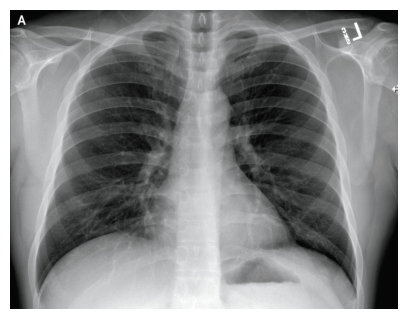

In [23]:
img = PILImage.create(path/'train/covid/nejmoa2001191_f1-PA.jpeg') # version  Fastai 2.2.7
img.show()

In [7]:
bs = 16
np.random.seed(7)

In [8]:
#tfms = get_transforms(do_flip=True,flip_vert=False, max_rotate=25)
tfms = aug_transforms(flip_vert=False, max_rotate=10)

In [9]:
# Cargar los datos
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='validation'),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=tfms
)

# Carga el dataset desde la carpeta
data = data.dataloaders(path, bs=bs, num_workers=4)
#dls = dls.new(after_batch=[Normalize.from_stats(*imagenet_stats)]) ... malogra el filtro


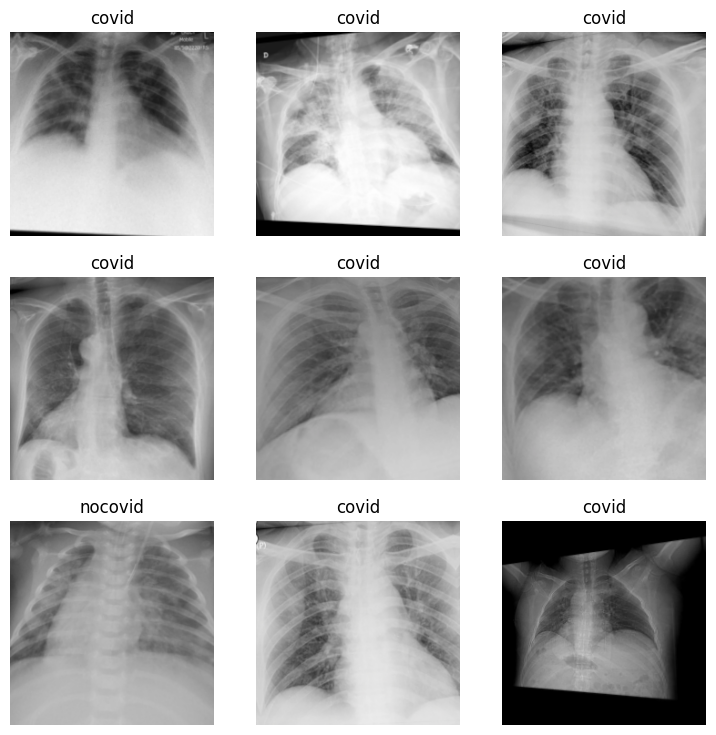

In [24]:
#dls.show_batch(3, figsize=(6,6))
data.show_batch()

In [25]:
#datos del dataset
data.c,len(data.train_ds), len(data.valid_ds)

(2, 37, 16)

**ETAPA 02:** CREA Y ENTRENA EL CLASIFICADOR DE IMAGENES

In [27]:
#clasificador con red RESNET34
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
#entrenamiento por epocas
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,1.065558,1.249539,0.562500,00:26
1,1.144901,1.069922,0.562500,00:16
2,1.289144,0.882394,0.437500,00:17
3,1.160596,0.732647,0.250000,00:17
4,1.040059,0.579596,0.187500,00:17
5,0.946963,0.633237,0.187500,00:18
6,0.918849,0.657079,0.187500,00:16


In [28]:
#directorio para guardar el modelo
dest=Path('/content/gdrive/MyDrive/Imagenes-clase-master/proyecto-IA/models/covidnocovid/')
try:
  dest.mkdir(parents=True, exist_ok=False)
except FileExistsError:
  print ('File Already Exists')

File Already Exists


In [29]:
#guadar modelo
learn.save(dest/'covidnocovid_stage-1')

Path('/content/gdrive/MyDrive/Imagenes-clase-master/proyecto-IA/models/covidnocovid/covidnocovid_stage-1.pth')

In [30]:
#verificamos la certeca de las predicciones del dataset
interp = ClassificationInterpretation.from_learner(learn)

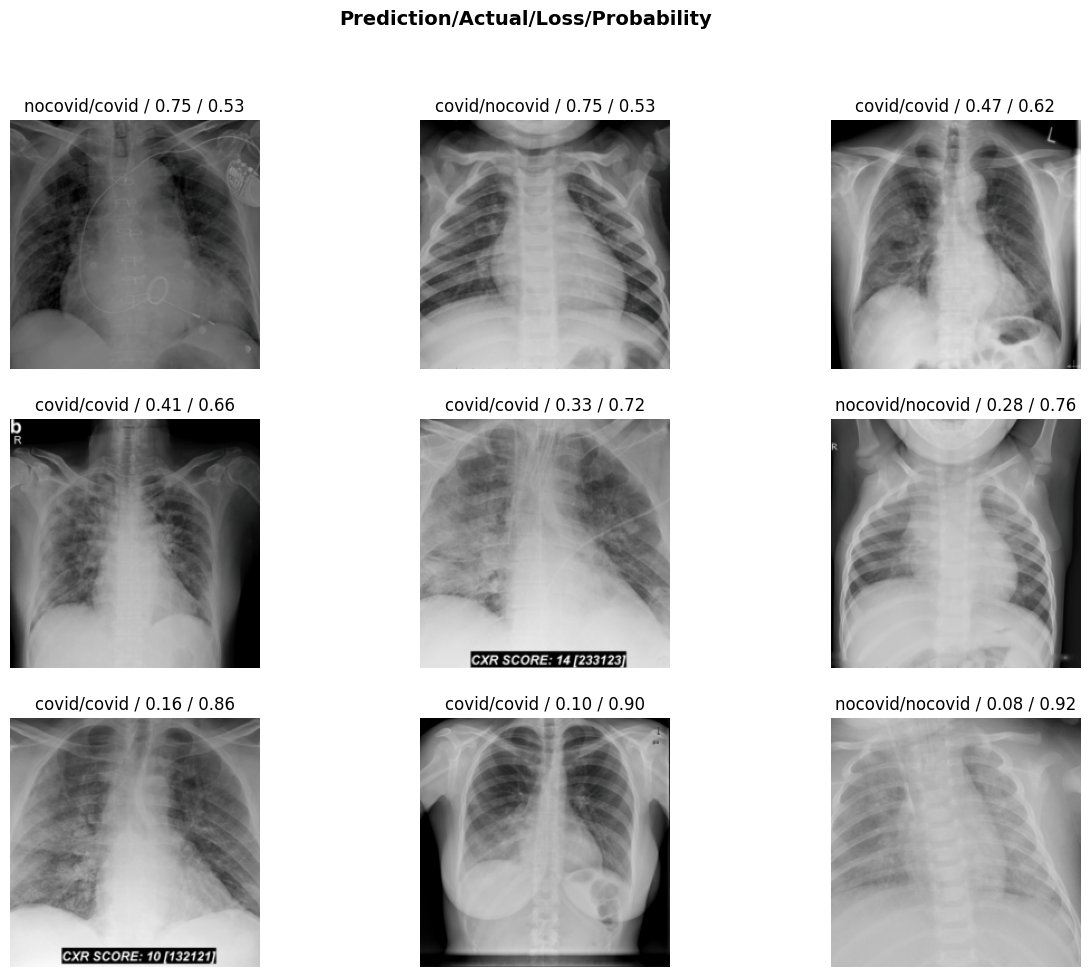

In [31]:
interp.plot_top_losses(9, figsize=(15,11))

**ETAPA 03:** USA EL CLASIFICADOR ENTRENADO PARA PREDECIR

Predicción: nocovid
Tensor: 1.0000
Probabilidad: tensor([0.1061, 0.8939])


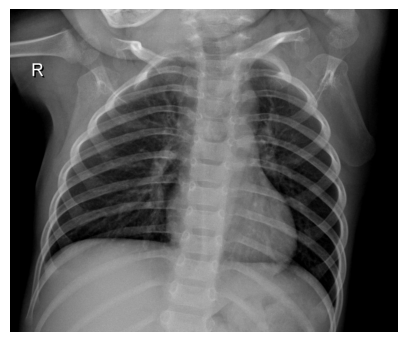

In [33]:
# Cargar la imagen de prueba
# test01: test/NORMAL2-IM-1442-0001.jpeg
# test02: test/covid-19-pneumonia-44-day-8.jpeg
img = PILImage.create(path/'test/NORMAL2-IM-1442-0001.jpeg')
img.show()

# Hacer una predicción con el modelo previamente entrenado
pred,tensor, prob = learn.predict(img)

# Mostrar el resultado
print(f"Predicción: {pred}")  # Imprimir la clase predicha
print(f"Tensor: {tensor:0.4f}")
print("Probabilidad:", prob) # Imprimir la probabilidad


Fuentes:

https://medium.com/saturdays-ai/detector-de-covid-19-usando-im%C3%A1genes-de-rayos-x-eaa146efa26

https://www.freecodecamp.org/news/deep-learning-with-fastai/

https://docs.fast.ai/data.transforms.html